<a href="https://colab.research.google.com/github/Sowmyadevalla2005/Theme-based/blob/main/TB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

**Importing the Dependencies**


In [4]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords #Natural language tool kit
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Printing stop words in english

In [7]:
print(stopwords.words('english')) # doesnot add any meaning to our textual data ML model doesnot require these words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Loading the data from csv file to pandas data frame

In [8]:
twitter_true = pd.read_csv('/content/DataSet_Misinfo_TRUE.csv')

Checking the number of rows and columns

In [9]:
twitter_true.shape

(34975, 2)

Printing first 5 rows

In [10]:
twitter_true.head()

,Unnamed: 0,text
0,0,The head of a conservative Republican faction ...
1,1,Transgender people will be allowed for the fir...
2,2,The special counsel investigation of links bet...
3,3,Trump campaign adviser George Papadopoulos tol...
4,4,President Donald Trump called on the U.S. Post...


Naming the columns and reading the dataset again

In [11]:
column_names=['Id','Text']
twitter_true = pd.read_csv('/content/DataSet_Misinfo_TRUE.csv',names=column_names)

In [12]:
twitter_true.shape

(34976, 2)

In [13]:
twitter_true.head()

,Id,Text
0,NaN,text
1,0.0,The head of a conservative Republican faction ...
2,1.0,Transgender people will be allowed for the fir...
3,2.0,The special counsel investigation of links bet...
4,3.0,Trump campaign adviser George Papadopoulos tol...


**Counting number of missing values in the data set **

In [14]:
twitter_true.isnull().sum()

,0
Id,1
Text,29


In [15]:
twitter_true.dropna(inplace=True) #removes rows containing NaN values


after that



In [16]:
twitter_true.isnull().sum()

,0
Id,0
Text,0


Checking the distribution of target column

In [19]:
twitter_true['Id'].value_counts()

,count
Id,
0.0,1
23328.0,1
23322.0,1
23323.0,1
23324.0,1
...,...
11672.0,1
11671.0,1
11670.0,1


In [20]:
twitter_fake = pd.read_csv('/content/DataSet_Misinfo_FAKE (1).csv')

In [21]:
twitter_fake.shape

(43642, 2)

In [22]:
twitter_fake.head()

,Unnamed: 0,text
0,0,Donald Trump just couldn t wish all Americans ...
1,1,House Intelligence Committee Chairman Devin Nu...
2,2,"On Friday, it was revealed that former Milwauk..."
3,3,"On Christmas day, Donald Trump announced that ..."
4,4,Pope Francis used his annual Christmas Day mes...


In [23]:
column_names=['Id','Text']
twitter_fake = pd.read_csv('/content/DataSet_Misinfo_FAKE (1).csv',names=column_names)

In [24]:
twitter_fake.shape

(43643, 2)

In [25]:
twitter_fake.head()

,Id,Text
0,NaN,text
1,0.0,Donald Trump just couldn t wish all Americans ...
2,1.0,House Intelligence Committee Chairman Devin Nu...
3,2.0,"On Friday, it was revealed that former Milwauk..."
4,3.0,"On Christmas day, Donald Trump announced that ..."


In [26]:
twitter_fake.isnull().sum()

,0
Id,1
Text,0


In [27]:
twitter_fake.dropna(inplace=True)

In [28]:
twitter_fake.isnull().sum()

,0
Id,0
Text,0


In [30]:
twitter_fake['Id'].value_counts()

,count
Id,
0.0,1
29803.0,1
29795.0,1
29796.0,1
29797.0,1
...,...
14926.0,1
14927.0,1
14928.0,1


In [31]:
twitter_true.describe()
twitter_fake.describe()

,Id
count,43642.000000
mean,22293.806173
std,12889.800176
min,0.000000
25%,10910.250000
50%,22450.500000
75%,33472.750000
max,44426.000000


Text Cleaning: This is crucial for text analysis. Here's a common sequence:


In [37]:
import re  # For regular expressions

def clean_text(Text):
    Text = str(Text).lower()  # Lowercase
    Text = re.sub(r'\[.*?\]', '', Text)  # Remove Text in square brackets
    Text = re.sub(r'https?://\S+|www\.\S+', '', Text)  # Remove URLs
    Text = re.sub(r'<.*?>+', '', Text)  # Remove HTML tags
    Text = re.sub(r'[%s]' % re.escape(string.punctuation), '', Text)  # Remove punctuation
    Text = re.sub(r'\n', '', Text)  # Remove newline characters
    Text = re.sub(r'\w*\d\w*', '', Text)  # Remove words containing numbers
    return Text

import string

twitter_true['Text'] = twitter_true['Text'].apply(clean_text)
twitter_fake['Text'] = twitter_fake['Text'].apply(clean_text)


REMOVING STOP WORDS

In [40]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download the stopwords list if you haven't already

stop_words = set(stopwords.words('english'))

def remove_stopwords(Text):
    words = Text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

twitter_true['Text'] = twitter_true['Text'].apply(remove_stopwords)
twitter_fake['Text'] = twitter_fake['Text'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Stemming/Lemmatization: Reduce words to their root form. Lemmatization is generally preferred.**

In [41]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')  # Download WordNet if you haven't already

lemmatizer = WordNetLemmatizer()

def lemmatize_text(Text):
    words = Text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

twitter_true['Text'] = twitter_true['Text'].apply(lemmatize_text)
twitter_fake['Text'] = twitter_fake['Text'].apply(lemmatize_text)


#Downloads WordNet: Downloads the WordNet lexical database, which is used for lemmatization.
#Lemmatizes Text: Applies lemmatization to each word in the text. Lemmatization reduces words to their dictionary base form (lemma).

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [42]:
twitter_true['label'] = 'true'
twitter_fake['label'] = 'fake'

all_news = pd.concat([twitter_true, twitter_fake], ignore_index=True)




In [43]:
all_news.shape

(78588, 3)

In [44]:
all_news.head()

,Id,Text,label
0,0.0,head conservative republican faction u congres...,true
1,1.0,transgender people allowed first time enlist u...,true
2,2.0,special counsel investigation link russia pres...,true
3,3.0,trump campaign adviser george papadopoulos tol...,true
4,4.0,president donald trump called u postal service...,true


Exploratory Data Analysis (EDA) After Cleaning

**Label Distribution: Check the balance of 'true' and 'fake' labels.**

In [47]:
print("\nLabel Distribution:")
all_news['label'].value_counts()



Label Distribution:


,count
label,
fake,43642
true,34946


# **Text *bold text* Length Analysis: Look at the distribution of text lengths (number of words) for true vs. fake news. This can sometimes reveal differences.**



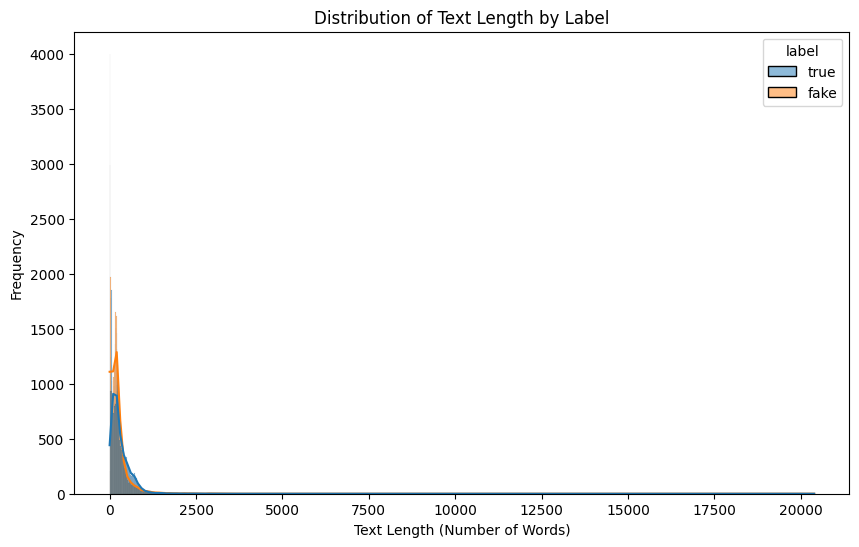

In [50]:
all_news['text_length'] = all_news['Text'].apply(lambda x: len(x.split()))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=all_news, x='text_length', hue='label', kde=True)
plt.title('Distribution of Text Length by Label')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()


**Word Frequency Analysis: Identify the most frequent words in true vs. fake news. This can give you insights into the topics and writing styles**

In [51]:
from collections import Counter

def top_words(Text, n=10):
    words = Text.split()
    return Counter(words).most_common(n)

twitter_true = ' '.join(all_news[all_news['label'] == 'true']['Text'])
twitter_fake = ' '.join(all_news[all_news['label'] == 'fake']['Text'])

print("\nTop 10 Words in True News:", top_words(twitter_true))
print("Top 10 Words in Fake News:", top_words(twitter_fake))



Top 10 Words in True News: [('said', 164650), ('trump', 73866), ('mr', 70255), ('state', 58695), ('would', 55936), ('u', 50623), ('”', 46299), ('—', 44593), ('president', 43664), ('year', 39366)]
Top 10 Words in Fake News: [('trump', 96043), ('u', 50616), ('people', 47768), ('said', 46766), ('one', 44679), ('would', 43038), ('state', 42006), ('clinton', 41209), ('president', 36844), ('time', 33411)]
